In [31]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [32]:
import os
import cv2
import random
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.utils import to_categorical

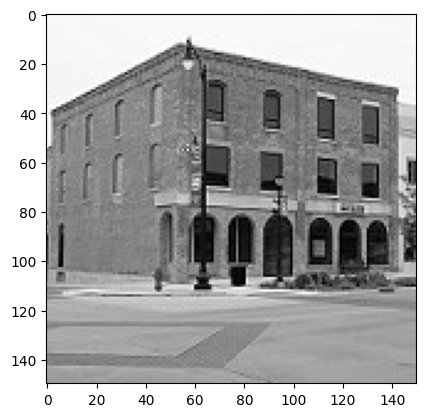

In [33]:
# Set Directory path
base_dir = '/drive/MyDrive/Colab Notebooks/nature'
train_dir = os.path.join(base_dir, 'seg_train', 'seg_train')
test_dir = os.path.join(base_dir, 'seg_test', 'seg_test')

train_DATADIR = os.path.join(base_dir, 'seg_train', 'seg_train')
test_DATADIR = os.path.join(base_dir, 'seg_test', 'seg_test')

CATEGORIES = ["buildings", "forest", "glacier","mountain", "sea", "street"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(train_DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [34]:
print(img_array)

[[248 248 248 ... 248 248 249]
 [248 248 248 ... 247 248 248]
 [248 248 248 ... 247 247 247]
 ...
 [157 156 156 ... 160 159 159]
 [155 155 155 ... 156 157 157]
 [154 154 154 ... 156 158 159]]


In [35]:
print(img_array.shape)

(150, 150)


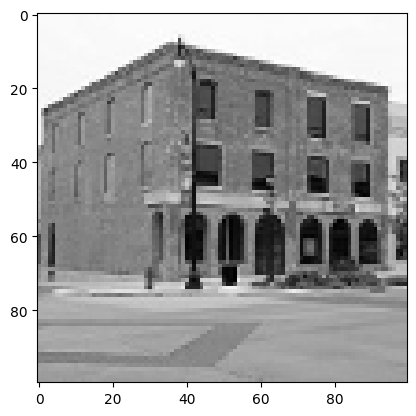

In [36]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [58]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(train_dir,category)  
        class_num = CATEGORIES.index(category)  # get the classification  

        for img in os.listdir(path):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

In [59]:
testing_data = []

def create_testing_data():
    for category in CATEGORIES:  

        path = os.path.join(test_dir,category)  
        class_num = CATEGORIES.index(category)  # get the classification  

        for img in os.listdir(path):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                testing_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_testing_data()

In [39]:
print(len(training_data))

2700


In [40]:
print(len(testing_data))

536


In [60]:
random.shuffle(training_data)
random.shuffle(testing_data)

In [61]:
for sample in training_data[:10]:
    print(sample[1])

4
2
3
3
5
4
4
2
4
5


In [62]:
#training data
X_train = []
y_train = []

for features,label in training_data:
    X_train.append(features)
    y_train.append(label)

print(X_train[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)

[[[[116]
   [118]
   [121]
   ...
   [124]
   [125]
   [124]]

  [[115]
   [118]
   [119]
   ...
   [125]
   [125]
   [124]]

  [[117]
   [119]
   [121]
   ...
   [126]
   [125]
   [124]]

  ...

  [[ 73]
   [ 79]
   [ 87]
   ...
   [ 94]
   [ 94]
   [ 92]]

  [[ 72]
   [ 72]
   [ 72]
   ...
   [ 89]
   [ 84]
   [ 93]]

  [[ 77]
   [ 79]
   [ 75]
   ...
   [ 91]
   [ 83]
   [ 76]]]]


In [63]:
#testing data
X_test = []
y_test = []

for features,label in testing_data:
    X_test.append(features)
    y_test.append(label)

print(X_test[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y_test)

[[[[101]
   [ 85]
   [ 13]
   ...
   [ 84]
   [ 81]
   [ 83]]

  [[ 87]
   [ 71]
   [ 19]
   ...
   [ 82]
   [ 80]
   [ 83]]

  [[ 87]
   [ 69]
   [ 15]
   ...
   [107]
   [101]
   [ 94]]

  ...

  [[110]
   [115]
   [109]
   ...
   [ 87]
   [ 85]
   [ 83]]

  [[118]
   [116]
   [117]
   ...
   [ 86]
   [ 79]
   [ 71]]

  [[ 99]
   [109]
   [122]
   ...
   [107]
   [107]
   [103]]]]


In [64]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

In [65]:
X_train= X_train/255.0

X_test = X_test/255.0

# convert integer labels to one-hot encoded labels
num_classes = 6
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

L1=64
L2=128
L3=128

model = Sequential()
model.add(Conv2D(L1,(4,4),activation='relu', input_shape=X_train.shape[1:],padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(L2,(4,4),activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(L3,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(6,activation='softmax'))

In [66]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [67]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (2700, 100, 100, 1)
y_train shape (2700, 6)
X_test shape (536, 100, 100, 1)
y_test shape (536, 6)


In [68]:
history = model.fit(X_train, y_train, epochs=10, batch_size=60,
                    validation_data=(X_test, y_test))

Epoch 1/10
45/45 [==============================] - 207s 5s/step - loss: 1.5930 - accuracy: 0.3563 - val_loss: 1.3874 - val_accuracy: 0.4254
Epoch 2/10
45/45 [==============================] - 215s 5s/step - loss: 1.2577 - accuracy: 0.4759 - val_loss: 1.2165 - val_accuracy: 0.5056
Epoch 3/10
45/45 [==============================] - 203s 5s/step - loss: 1.1507 - accuracy: 0.5196 - val_loss: 1.1394 - val_accuracy: 0.5653
Epoch 4/10
45/45 [==============================] - 211s 5s/step - loss: 1.0829 - accuracy: 0.5719 - val_loss: 1.0667 - val_accuracy: 0.5933
Epoch 5/10
45/45 [==============================] - 203s 5s/step - loss: 1.0168 - accuracy: 0.6030 - val_loss: 1.0585 - val_accuracy: 0.5728
Epoch 6/10
45/45 [==============================] - 203s 4s/step - loss: 0.8932 - accuracy: 0.6515 - val_loss: 1.0808 - val_accuracy: 0.5914
Epoch 7/10
45/45 [==============================] - 203s 5s/step - loss: 0.8087 - accuracy: 0.6974 - val_loss: 1.0407 - val_accuracy: 0.6418
Epoch 8/10
45

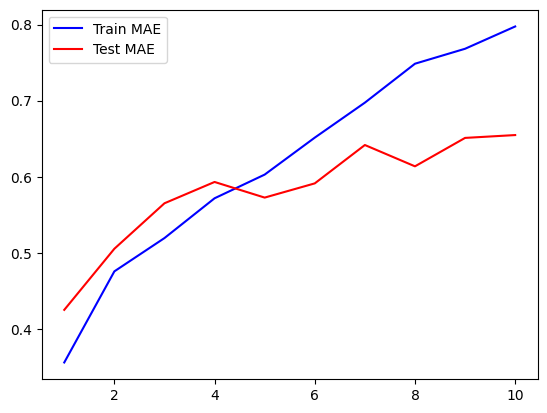

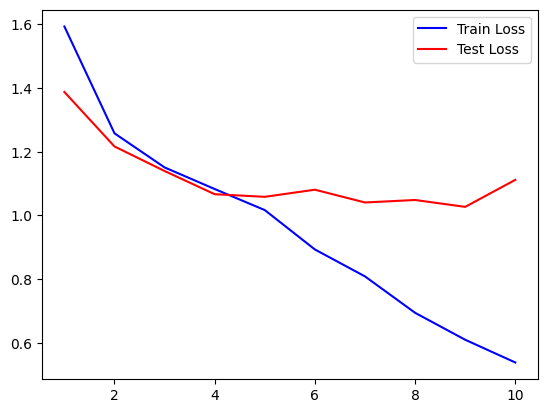

In [69]:
acc =history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)


plt.plot(epochs, acc,'b',label='Train MAE')
plt.plot(epochs, val_acc,'r',label='Test MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

X_test shape (100, 100, 1)
X_train shape (100, 100, 1)


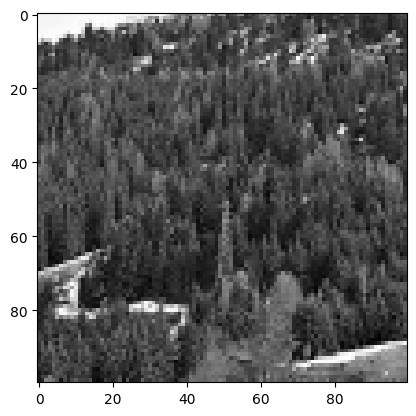

In [54]:
image_index = 2
input_image = X_test[image_index]
print("X_test shape", input_image.shape)
print("X_train shape", X_train[0].shape)
plt.imshow(input_image, cmap='gray')  # graph it
plt.show()  # display!

In [57]:
#input_image = np.expand_dims(input_image, axis = 0)
#prediction = model.predict(input_image)

#print("Prediction for this image is :",CATEGORIES[int(prediction[0][0])])

In [ ]:
#print(prediction)  # will be a list in a list.
#print(CATEGORIES[int(prediction[0][0])])